In [8]:
import sys, os

In [2]:
sys.executable

'C:\\Users\\arpit\\Miniconda3\\python.exe'

In [32]:
import geopandas as gpd
import pandas as pd

In [15]:
import geojson
import os
path = "C:\\Users\\arpit\\Desktop\\Spring 2019\\Practicum\\GEOJASON"
os.chdir(path)


In [16]:
import shapely

In [17]:
states = gpd.read_file('DallasMarketValueAnalysis_20190207003242.geojson')
print(states.head())

  vpt_res_vac pperm_ncunt pfcl_oo1517 md_sales_pr prehab_perm esri_oid  \
0        0.02           0           0      103115           0      343   
1       0.011           0        0.13      115000       0.004      344   
2        0.02           0           0      481096       0.007      345   
3       0.081        0.04         0.5       99426           0      346   
4       0.019           0           0      142244           0      347   

  mvacluster coef_var phhoo paperm pcvln_rs_pr ppub_sub_all         geoid  \
0          E     0.21     0      0       0.003            1  481130078192   
1          E     0.35  0.18  0.004           0        0.028  481130078202   
2          C     0.34     0  0.007           0            0  481130078222   
3          G     0.32  0.02   0.04           0            0  481130078231   
4          E     0.18     0      0           0        0.096  481130078255   

        dynaID                                           geometry  
0  520_564_343  (POLYGON

In [91]:
states.geometry.type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
5      MultiPolygon
6      MultiPolygon
7      MultiPolygon
8      MultiPolygon
9      MultiPolygon
10     MultiPolygon
11     MultiPolygon
12     MultiPolygon
13     MultiPolygon
14     MultiPolygon
15          Polygon
16     MultiPolygon
17     MultiPolygon
18          Polygon
19     MultiPolygon
20     MultiPolygon
21     MultiPolygon
22     MultiPolygon
23     MultiPolygon
24     MultiPolygon
25     MultiPolygon
26     MultiPolygon
27     MultiPolygon
28     MultiPolygon
29     MultiPolygon
           ...     
882    MultiPolygon
883    MultiPolygon
884    MultiPolygon
885    MultiPolygon
886    MultiPolygon
887    MultiPolygon
888    MultiPolygon
889    MultiPolygon
890    MultiPolygon
891    MultiPolygon
892    MultiPolygon
893    MultiPolygon
894    MultiPolygon
895    MultiPolygon
896    MultiPolygon
897    MultiPolygon
898    MultiPolygon
899    MultiPolygon
900    MultiPolygon


In [94]:
if states.geometry.type == 'Polygon':
    x, y = poly.geometry.exterior.xy
elif states.geometry.type == 'MultiPolygon':
    allparts = [p.buffer(0) for p in states.geometry]
    states.geometry = shapely.ops.cascaded_union(allparts)
    x, y = states.geometry.exterior.xy  # here happens the error

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

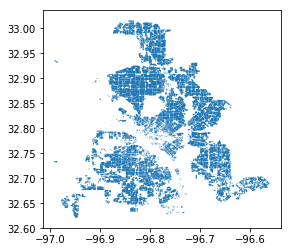

In [25]:
#type(states)
states.plot()

In [20]:
Texas_zip = gpd.read_file('TX Zip Codes_20190212005826.geojson')
print(Texas_zip.head())

    Name Description        dynaID  \
0  78520              591_639_2881   
1  785XX              591_639_2882   
2  78526              591_639_2883   
3  78521              591_639_2884   
4  75182               591_639_721   

                                            geometry  
0  POLYGON ((-97.584766 26.044855, -97.5999659999...  
1  POLYGON ((-97.226904 26.020106, -97.2265490000...  
2  POLYGON ((-97.42165900000001 25.947257, -97.42...  
3  POLYGON ((-97.42165900000001 25.947257, -97.42...  
4  POLYGON ((-96.548569 32.842226, -96.549069 32....  


In [89]:
dallas_obj=[]
dallas=[75203,
75204,
75205,
75208,
75209,
75210,
75211,
75212,
75214,
75201,
75202,
75206,
75207,
75215,
75216,
75217,
75218,
75222,
75223,
75224,
75225,
75230,
75231,
75232,
75233,
75236,
75237,
75238,
75240,
75246,
75251,
75252,
75253,
75219,
75220,
75221,
75226,
75227,
75228,
75229,
75234,
75235,
75241,
75242,
75243,
75244,
75247,
75248,
75249,
75250,
75254,
75260,
75261,
75265,
75266,
75267,
75270,
75275,
75284,
75285,
75262,
75263,
75264,
75277,
75283,
75287,
75301,
75315,
75320,
75326,
75355,
75356,
75357,
75358,
75370,
75371,
75372,
75373,
75381,
75382,
75389,
75390,
75393,
75394,
75395,
75303,
75312,
75313,
75336,
75339,
75342,
75354,
75359,
75360,
75367,
75368,
75374,
75376,
75378,
75379,
75380,
75391,
75392,
75397,
75398]
dallas_zip = pd.DataFrame({'Name': dallas})
#print (dallas_zip)

In [90]:
dallas_zip['Name']=dallas_zip['Name'].astype(object)
dallas_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 1 columns):
Name    105 non-null object
dtypes: object(1)
memory usage: 920.0+ bytes


In [82]:
join = states.merge(Texas_zip, on='geometry')

TypeError: unhashable type: 'MultiPolygon'

In [80]:
print(join.head)

<bound method NDFrame.head of Empty GeoDataFrame
Columns: [Name, Description, dynaID, geometry]
Index: []>
